<a href="https://colab.research.google.com/github/SarahSouzaPontes/nlp_linguagem/blob/main/Processamento_de_Linguagem_Natural_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy == 2.2.3

ERROR: Invalid requirement: '=='


In [2]:
# Instala o pacote PT-BR

!python3 -m spacy download pt

2023-05-28 02:54:26.617021: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 02:54:30.376775: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 49.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [3]:
# Importa as bibliotecas necessárias

import spacy
import pandas as pd
import string
import random
import seaborn as sns
import numpy as np

In [4]:
# Este código foi desenvolvido com a versão 3.5.2 do spaCy

spacy.__version__

'3.5.2'

In [5]:
#Carregando dataset -> Kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Carrega a base de treinamento

base_treinamento = pd.read_csv('/content/base_treinamento.txt')
base_treinamento.head()



,texto,emocao
0,este trabalho é agradável,positivo
1,gosto de ficar no seu aconchego,positivo
2,fiz a adesão ao curso hoje,positivo
3,eu sou admirada por muitos,positivo
4,adoro como você,positivo


<Axes: xlabel='emocao', ylabel='count'>

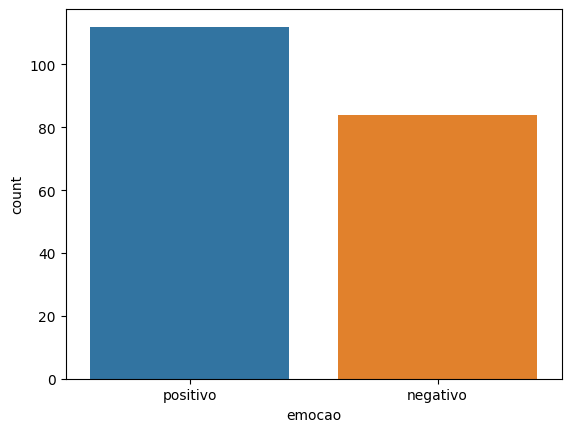

In [10]:
import seaborn as sns

# Conta os valores únicos na coluna 'emocao'
contagem_emocao = base_treinamento['emocao'].value_counts()

# Plota a distribuição dos dados da variável 'emocao'
sns.countplot(data=base_treinamento, x='emocao', order=contagem_emocao.index)

In [11]:
#Pre-processamento
# Instancia a variável pontuacoes

pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
# Instancia a variável stop_words

from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS
print(stop_words)

{'quinto', 'toda', 'pegar', 'deste', 'demais', 'fará', 'quando', 'porquanto', 'vez', 'quem', 'dessa', 'conhecida', 'vais', 'naquele', 'sétimo', 'vosso', 'umas', 'se', 'põe', 'fazeis', 'inclusive', 'primeira', 'nos', 'és', 'ponto', 'cinco', 'sois', 'três', 'nossas', 'algo', 'fim', 'menor', 'todos', 'vossa', 'menos', 'alguns', 'nas', 'dizem', 'isto', 'querem', 'nunca', 'elas', 'meus', 'todo', 'ela', 'foste', 'saber', 'parte', 'eles', 'assim', 'ir', 'quer', 'antes', 'apenas', 'é', 'for', 'tu', 'tiveste', 'com', 'ser', 'após', 'nesta', 'aí', 'dezanove', 'maioria', 'à', 'era', 'às', 'dezasseis', 'aqui', 'onze', 'aquela', 'ademais', 'logo', 'tais', 'relação', 'os', 'estiveram', 'zero', 'quieto', 'pois', 'aos', 'podem', 'local', 'pontos', 'apoia', 'dão', 'vinda', 'do', 'porquê', 'mesmo', 'fui', 'sim', 'corrente', 'fora', 'sexto', 'cento', 'estar', 'qualquer', 'somente', 'falta', 'apontar', 'coisa', 'desde', 'nessa', 'sabe', 'iniciar', 'dos', 'estado', 'essas', 'grupo', 'quarto', 'pelas', 'tua

In [13]:
import spacy

# Carrega o modelo 'pt_core_news_sm'
pln = spacy.load("pt_core_news_sm")

In [14]:
import spacy

# Carrega o modelo 'pt_core_news_sm'
nlp = spacy.load("pt_core_news_sm")

# Definição da função de pré-processamento
def preprocessamento(texto):
    # Converte o texto para letras minúsculas
    texto = texto.lower()

    # Passa o texto pelo processador de linguagem natural
    documento = nlp(texto)

    # Cria uma lista vazia para armazenar os tokens processados
    lista = []

    # Itera sobre cada token no documento processado
    for token in documento:
        # Adiciona o lema de cada token à lista
        lista.append(token.lemma_)

    # Remove as palavras irrelevantes (stop words) e pontuações da lista
    stop_words = []  # Defina sua lista de stop words aqui
    pontuacoes = []  # Defina sua lista de pontuações aqui
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]

    # Junta os elementos da lista em uma única string, separados por espaços
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

    # Retorna a string resultante
    return lista


# Exemplo de uso da função de pré-processamento
texto_exemplo = "Este é um exemplo de texto para pré-processamento."
texto_preprocessado = preprocessamento(texto_exemplo)
print(texto_preprocessado)

este ser um exemplo de texto para pré-processamento .


In [ ]:
teste = preprocessamento('meu nome é Sarah Pontes')
teste

In [16]:
# Limpeza dos textos
base_treinamento['texto'] = base_treinamento['texto'].apply(preprocessamento)

# Exibição das primeiras 5 linhas da base de treinamento após a limpeza
print(base_treinamento.head(5))

                               texto    emocao
0        este trabalho ser agradável  positivo
1  gosto de ficar em o seu aconchego  positivo
2        fiz o adesão a o curso hoje  positivo
3           eu ser admirar por muito  positivo
4                   adorar como você  positivo


In [17]:
# Tratamento das classes

# Exemplo de base de dados
exemplo_base_dados = [['este trabalho é agradável', {'POSITIVO': True, 'NEGATIVO': False}],
                      ['este lugar continua assustador', {'NEGATIVO': True, 'POSITIVO': False}]]

# O trecho de código acima representa uma base de dados fictícia composta por uma lista de exemplos.
# Cada exemplo é uma lista que contém um texto e um dicionário de classes associadas ao texto.

# A estrutura do dicionário de classes é {'CLASSE': VALOR}, onde 'CLASSE' é a classe atribuída ao texto e VALOR indica se a classe é verdadeira ou falsa.

# Esse tipo de estrutura é comumente utilizado para treinamento de modelos de classificação, onde cada texto está associado a uma ou mais classes.

# No exemplo acima, temos dois exemplos de texto com suas classes associadas:
# - O primeiro texto "este trabalho é agradável" está associado às classes {'POSITIVO': True, 'NEGATIVO': False}, indicando que é um texto positivo.
# - O segundo texto "este lugar continua assustador" está associado às classes {'NEGATIVO': True, 'POSITIVO': False}, indicando que é um texto negativo.

# Esse tipo de estrutura é útil para tarefas de classificação de texto, onde é necessário atribuir uma ou mais classes a um determinado texto.

# Você pode adaptar esse exemplo de base de dados de acordo com as suas necessidades, substituindo os textos e as classes pelos seus próprios dados.

In [18]:
# Mapeia para cada valor de emoção e adiciona à lista as frases da base

# Cria uma lista vazia para armazenar os dados finais da base
base_dados_final = []

# Itera sobre cada par de texto e emoção na base de treinamento
for texto, emocao in zip(base_treinamento['texto'], base_treinamento['emocao']):
    
    # Verifica o valor da emoção e atribui o dicionário de classes correspondente
    if emocao == 'positivo':
        dic = {'POSITIVO': True, 'NEGATIVO': False}
    elif emocao == 'negativo':
        dic = {'POSITIVO': False, 'NEGATIVO': True}

    # Cria uma nova lista com o texto e o dicionário de classes associado
    base_dados_final.append([texto, dic.copy()])         

# O trecho de código acima percorre a base de treinamento, que possui duas colunas: 'texto' e 'emocao'.
# Para cada par de texto e emoção, ele realiza as seguintes etapas:

# - Verifica o valor da emoção:
#     - Se a emoção for 'positivo', atribui o dicionário de classes {'POSITIVO': True, 'NEGATIVO': False}.
#     - Se a emoção for 'negativo', atribui o dicionário de classes {'POSITIVO': False, 'NEGATIVO': True}.

# - Cria uma nova lista contendo o texto e o dicionário de classes associado.

# - Adiciona a nova lista à lista base_dados_final.

# Ao final da execução desse trecho de código, a lista base_dados_final estará preenchida com as frases da base de treinamento,
# onde cada frase é acompanhada pelo seu dicionário de classes correspondente.

# Certifique-se de ter uma base de treinamento válida, com as colunas 'texto' e 'emocao', antes de executar esse código.

In [19]:
base_dados_final

[['este trabalho ser agradável', {'POSITIVO': True, 'NEGATIVO': False}],
 ['gosto de ficar em o seu aconchego', {'POSITIVO': True, 'NEGATIVO': False}],
 ['fiz o adesão a o curso hoje', {'POSITIVO': True, 'NEGATIVO': False}],
 ['eu ser admirar por muito', {'POSITIVO': True, 'NEGATIVO': False}],
 ['adorar como você', {'POSITIVO': True, 'NEGATIVO': False}],
 ['adorar seu cabelo macio', {'POSITIVO': True, 'NEGATIVO': False}],
 ['adorar o cor de o seu olho', {'POSITIVO': True, 'NEGATIVO': False}],
 ['somo tão amável um com o outro', {'POSITIVO': True, 'NEGATIVO': False}],
 ['sinto um grande afeição por ele', {'POSITIVO': True, 'NEGATIVO': False}],
 ['querer agradar meu filho', {'POSITIVO': True, 'NEGATIVO': False}],
 ['eu sinto completamente amar', {'POSITIVO': True, 'NEGATIVO': False}],
 ['eu amo você', {'POSITIVO': True, 'NEGATIVO': False}],
 ['que grande alívio', {'POSITIVO': True, 'NEGATIVO': False}],
 ['o dor este amenizar finalmente', {'POSITIVO': True, 'NEGATIVO': False}],
 ['achar q

In [20]:
# Cria o modelo que será utilizado

modelo = spacy.blank('pt') # Aqui instanciamos a variável modelo que receberá um pipeline (cadeia de funções) vazio do idioma alvo

categorias = modelo.create_pipe('textcat') # Cria o pipeline a partir da variável modelo e recebe o parâmetro 'textcat', que é o categorizador de texto  
                                           # para prever categorias em todo o documento
    
categorias.add_label('POSITIVO') # Adiciona a label 'POSITIVO' 
categorias.add_label('NEGATIVO') # Adiciona a label 'NEGATIVO'



1

In [21]:
import spacy

@spacy.Language.component('seu_nome')
def seu_componente(doc):
    # Implemente aqui a lógica do seu componente personalizado
    return doc

# Instancia uma variável 'modelo' que receberá um pipeline vazio do idioma alvo, que neste caso é o idioma português ('pt')
modelo = spacy.blank('pt')

# Cria um novo pipeline chamado 'categorias' a partir do objeto 'modelo' usando o método 'create_pipe()'
# O pipeline 'textcat' é usado para prever categorias em todo o documento
categorias = modelo.add_pipe('textcat')

# Adiciona a label 'POSITIVO' ao pipeline 'categorias'
categorias.add_label('POSITIVO')

# Adiciona a label 'NEGATIVO' ao pipeline 'categorias'
categorias.add_label('NEGATIVO')

# Adiciona o componente personalizado 'seu_nome' ao pipeline de processamento do modelo
modelo.add_pipe('seu_nome')

# Cria uma lista vazia chamada 'historico' para receber os erros do treinamento
historico = []

In [22]:
# Treina o modelo com X épocas

modelo.begin_training()  # Inicia a fase de aprendizagem

for epoca in range(500):  # Itera 500 vezes
    random.shuffle(base_dados_final)  # Embaralha a lista com as frases
    losses = {}  # Cria um dicionário vazio que receberá os erros

    for batch in spacy.util.minibatch(base_dados_final, 30):  # Itera sobre 'batches' (lotes) de dados - 30 por vez.
        textos = [modelo(texto) for texto, entities in batch]  # Instancia a variável 'textos' que receberá as entidades processadas (cada texto para o modelo).
        annotations = [{'cats': entities} for texto, entities in batch]  # Aqui teremos os textos e as suas respectivas categorias
        examples = []

        for i in range(len(textos)):
            examples.append(spacy.training.Example.from_dict(textos[i], annotations[i]))
        
        modelo.update(examples, losses=losses)  # Faz a atualização do modelo com todos os exemplos e salva os erros
        
    if epoca % 100 == 0:  # A cada 100 épocas, é exibido o valor do erro
        print(losses)
        historico.append(losses)



{'textcat': 1.6396178156137466}
{'textcat': 3.028096675315728e-11}
{'textcat': 3.7801514034870726e-12}
{'textcat': 9.684611578940523e-13}
{'textcat': 3.623191410930633e-13}


In [23]:
historico

[{'textcat': 1.6396178156137466},
 {'textcat': 3.028096675315728e-11},
 {'textcat': 3.7801514034870726e-12},
 {'textcat': 9.684611578940523e-13},
 {'textcat': 3.623191410930633e-13}]

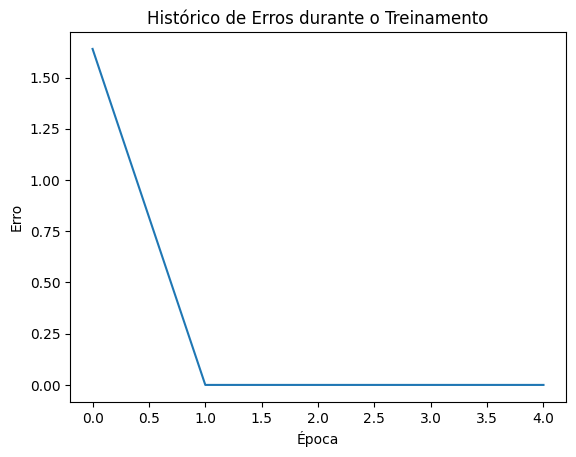

In [24]:
# Salva os erros
import matplotlib.pyplot as plt

historico_loss = []  # Cria uma lista vazia para armazenar os erros

for i in historico:
    historico_loss.append(i.get('textcat'))  # Adiciona somente os valores dos erros na lista
                                             # O método .get() captura o valor de cada chave 'textcat'

historico_loss = np.array(historico_loss)  # Converte a lista para um np.array, para poder plotar o gráfico com os erros

# Plotagem do gráfico de histórico de erros
plt.plot(historico_loss)
plt.xlabel('Época')
plt.ylabel('Erro')
plt.title('Histórico de Erros durante o Treinamento')
plt.show()


In [25]:
# Salva o modelo

modelo.to_disk('modelo')

In [26]:
# Carrega o modelo salvo
modelo_carregado = spacy.load('modelo')  # Carrega o modelo previamente treinado chamado 'modelo' e o atribui à variável 'modelo_carregado'


In [27]:
# Cria uma frase de teste
texto = 'Hoje de manhã eu fui passear no parque'

# Aplica a função preprocessamento na frase
texto = preprocessamento(texto)  # Chama a função preprocessamento, passando a frase como argumento, e atribui o resultado à variável 'texto'



In [ ]:
previsao = modelo_carregado(texto)
previsao

In [29]:
previsao.cats

{'POSITIVO': 0.9999927282333374, 'NEGATIVO': 7.2874504439823795e-06}

In [30]:
# Avaliação do modelo
previsoes = []  # Cria uma lista vazia para armazenar as previsões do modelo para cada exemplo da base de treinamento

for texto in base_treinamento['texto']:  # Itera sobre cada texto da coluna 'texto' da base de treinamento
    previsao = modelo_carregado(texto)  # Aplica o modelo carregado ao texto atual, gerando uma previsão
    previsoes.append(previsao.cats)  # Adiciona a previsão na forma de um dicionário de categorias à lista de previsões

# Descrição do código:
# Neste trecho de código, avaliamos o modelo carregado aplicando-o a cada texto da coluna 'texto' da base de treinamento.
# Para cada texto, o modelo gera uma previsão de categorias. Essas previsões são armazenadas em uma lista chamada 'previsoes'.
# Cada previsão é representada por um dicionário de categorias, onde as chaves são as categorias possíveis (por exemplo, 'POSITIVO' e 'NEGATIVO')
# e os valores são as probabilidades atribuídas a cada categoria pelo modelo.
# Ao final desse trecho de código, teremos uma lista de previsões correspondentes a cada exemplo da base de treinamento.


In [31]:
previsoes

[{'POSITIVO': 0.9999998807907104, 'NEGATIVO': 1.0823143270499713e-07},
 {'POSITIVO': 1.0, 'NEGATIVO': 3.5110744533994875e-08},
 {'POSITIVO': 1.0, 'NEGATIVO': 3.5001686882196736e-08},
 {'POSITIVO': 0.9999996423721313, 'NEGATIVO': 3.612743739722646e-07},
 {'POSITIVO': 1.0, 'NEGATIVO': 7.393307299707885e-09},
 {'POSITIVO': 0.9999998807907104, 'NEGATIVO': 6.205306135598221e-08},
 {'POSITIVO': 1.0, 'NEGATIVO': 5.2252225657412055e-08},
 {'POSITIVO': 0.9999998807907104, 'NEGATIVO': 7.241894195431087e-08},
 {'POSITIVO': 0.9999997615814209, 'NEGATIVO': 2.244496499770321e-07},
 {'POSITIVO': 0.9999997615814209, 'NEGATIVO': 2.3359112333309895e-07},
 {'POSITIVO': 1.0, 'NEGATIVO': 3.824845862254733e-08},
 {'POSITIVO': 1.0, 'NEGATIVO': 1.676384542292908e-08},
 {'POSITIVO': 1.0, 'NEGATIVO': 1.497434176656043e-08},
 {'POSITIVO': 0.9999998807907104, 'NEGATIVO': 1.3567201051500888e-07},
 {'POSITIVO': 0.9999997615814209, 'NEGATIVO': 2.9434582415888144e-07},
 {'POSITIVO': 0.9999998807907104, 'NEGATIVO': 7.

In [32]:
# Cria uma lista, avalia e adiciona cada um dos exemplos da base de treinamento

previsoes_final = []  # Cria uma lista vazia para armazenar as previsões finais (positivo ou negativo) para cada exemplo da base de treinamento

for previsao in previsoes:  # Itera sobre cada previsão gerada pelo modelo para os exemplos da base de treinamento
    if previsao['POSITIVO'] > previsao['NEGATIVO']:  # Verifica se a probabilidade atribuída à categoria 'POSITIVO' é maior do que a probabilidade da categoria 'NEGATIVO'
        previsoes_final.append('positivo')  # Se a probabilidade de 'POSITIVO' for maior, adiciona 'positivo' à lista de previsões finais
    else:
        previsoes_final.append('negativo')  # Caso contrário, adiciona 'negativo' à lista de previsões finais

previsoes_final = np.array(previsoes_final)  # Converte a lista de previsões finais para um array numpy


In [33]:
previsoes_final

array(['positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positi

In [34]:
# Obtém as respostas reais (emoções) dos exemplos da base de treinamento
respostas_reais_treinamento = base_treinamento['emocao'].values


In [35]:
from sklearn.metrics import accuracy_score

# Calcula a acurácia comparando as respostas reais com as previsões do modelo
acuracia = accuracy_score(respostas_reais_treinamento, previsoes_final)


In [38]:
# Carrega a base de treinamento

base_teste = pd.read_csv('/content/base_teste.txt')
base_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,positivo
1,se eu ajeitar tudo fica bem,positivo
2,minha fortuna ultrapassará a sua,positivo
3,sou muito afortunado,positivo
4,é benéfico para todos esta nova medida,positivo


In [39]:
# Aplica o pré-processamento em cada texto da base de teste
base_teste['texto'] = base_teste['texto'].apply(preprocessamento)

# Exibe as primeiras linhas da base de teste após a aplicação do pré-processamento
base_teste.head()


,texto,emocao
0,não precisar pagar o ingresso,positivo
1,se eu ajeitar tudo ficar bem,positivo
2,meu fortuna ultrapassar o seu,positivo
3,ser muito afortunar,positivo
4,ser benéfico para todo este novo medida,positivo


In [40]:
# Cria uma lista vazia 'previsoes' para armazenar os scores das previsões

previsoes = []

# Itera sobre cada texto da coluna 'texto' da base de teste
for texto in base_teste['texto']:
    # Realiza a previsão utilizando o modelo carregado ('modelo_carregado')
    previsao = modelo_carregado(texto)
    
    # Adiciona os scores da previsão à lista 'previsoes'
    previsoes.append(previsao.cats)


In [41]:
# Cria uma lista vazia 'previsoes_final' para armazenar as categorizações finais (positivo ou negativo)

previsoes_final = []

# Itera sobre cada previsão na lista 'previsoes'
for previsao in previsoes:
    # Verifica se o score da categoria 'POSITIVO' é maior que o score da categoria 'NEGATIVO'
    if previsao['POSITIVO'] > previsao['NEGATIVO']:
        # Se o score de 'POSITIVO' for maior, adiciona a categoria 'positivo' à lista 'previsoes_final'
        previsoes_final.append('positivo')
    else: 
        # Caso contrário, adiciona a categoria 'negativo' à lista 'previsoes_final'
        previsoes_final.append('negativo')

# Converte a lista 'previsoes_final' em um array numpy para facilitar a manipulação
previsoes_final = np.array(previsoes_final)
previsoes_final


array(['negativo', 'positivo', 'positivo', 'positivo', 'positivo',
       'negativo', 'negativo', 'positivo', 'positivo', 'positivo',
       'positivo', 'negativo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'negativo', 'negativo', 'positivo', 'negativo',
       'positivo', 'positivo', 'negativo', 'negativo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'negativo', 'positivo', 'positivo', 'positivo',
       'negativo', 'positivo', 'negativo', 'negativo', 'positivo',
       'negativo', 'negativo', 'positivo', 'positivo', 'negativo',
       'negativo', 'negativo', 'positivo', 'positivo', 'negativo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'negativo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'negativo', 'positivo', 'negativo', 'positi

In [42]:
# Obtém as respostas reais da coluna 'emocao' da base de teste

respostas_reais = base_teste['emocao'].values


In [43]:
respostas_reais

array(['positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'negativo', 'negativo',
       'negativo', 'negativo', 'negativo', 'negativo', 'negativo',
       'negativo', 'negativo', 'negativo', 'negativo', 'negativo',
       'negativo', 'negativo', 'negativo', 'negativo', 'negativo',
       'negativo', 'negativo', 'negativo', 'negativo', 'negativo',
       'negativo', 'negativo', 'negativo', 'negativo', 'negati

In [48]:
# Calcula a acurácia somente se o número de amostras for consistente
accuracy_score(respostas_reais, previsoes_final)


0.5833333333333334